In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import seaborn as sns

df_2017 = pd.read_csv('IPEDS2017.csv')

df_2017 = df_2017.set_index('UnitID')


df_2017.head()

for idx, column in enumerate(df_2017.columns):
    print(idx, column)

0 Unnamed: 0
1 Name
2 Percent on any financial aid
3 Number in financial aid cohort
4 Average total grant aid
5 Percent of students awarded Pell grants
6 Total amount of Pell grant aid awarded
7 Average amount Pell grant aid awarded
8 Percent of students awarded federal student loans
9 Average amount of federal student loans awarded
10 State
11 Level of institution
12 Institution size category
13 Total price for in-state students living on campus
14 Full-time undergraduate enrollment
15 Percent American Indian or Alaska Native
16 Percent Asian/Native Hawaiian/Pacific Islander
17 Percent Asian
18 Percent Native Hawaiian or Other Pacific Islander
19 Percent Black or African American
20 Percent Hispanic/Latino
21 Percent White
22 Percent two or more races
23 Percent Race/ethnicity unknown
24 Percent Nonresident Alien
25 Percent women
26 Admission test scores
27 Secondary school GPA
28 Secondary school rank
29 Applicants total
30 Admissions total
31 Enrolled total
32 Enrolled full time tot

In [30]:
x_feat_list = df_2017.columns[2:9]
x_feat_list = x_feat_list.append(df_2017.columns[11:33])

x = df_2017.loc[:, 'Percent on any financial aid' : 'Enrolled part time total']
x = x.drop('State', axis = 1)

y_feat = 'SAT Math 75th percentile'

y = df_2017.loc[:, y_feat]

Text(0.5, 1.0, 'Predicted vs. Actual SAT Math 75th percentile (R2 = 0.742)')

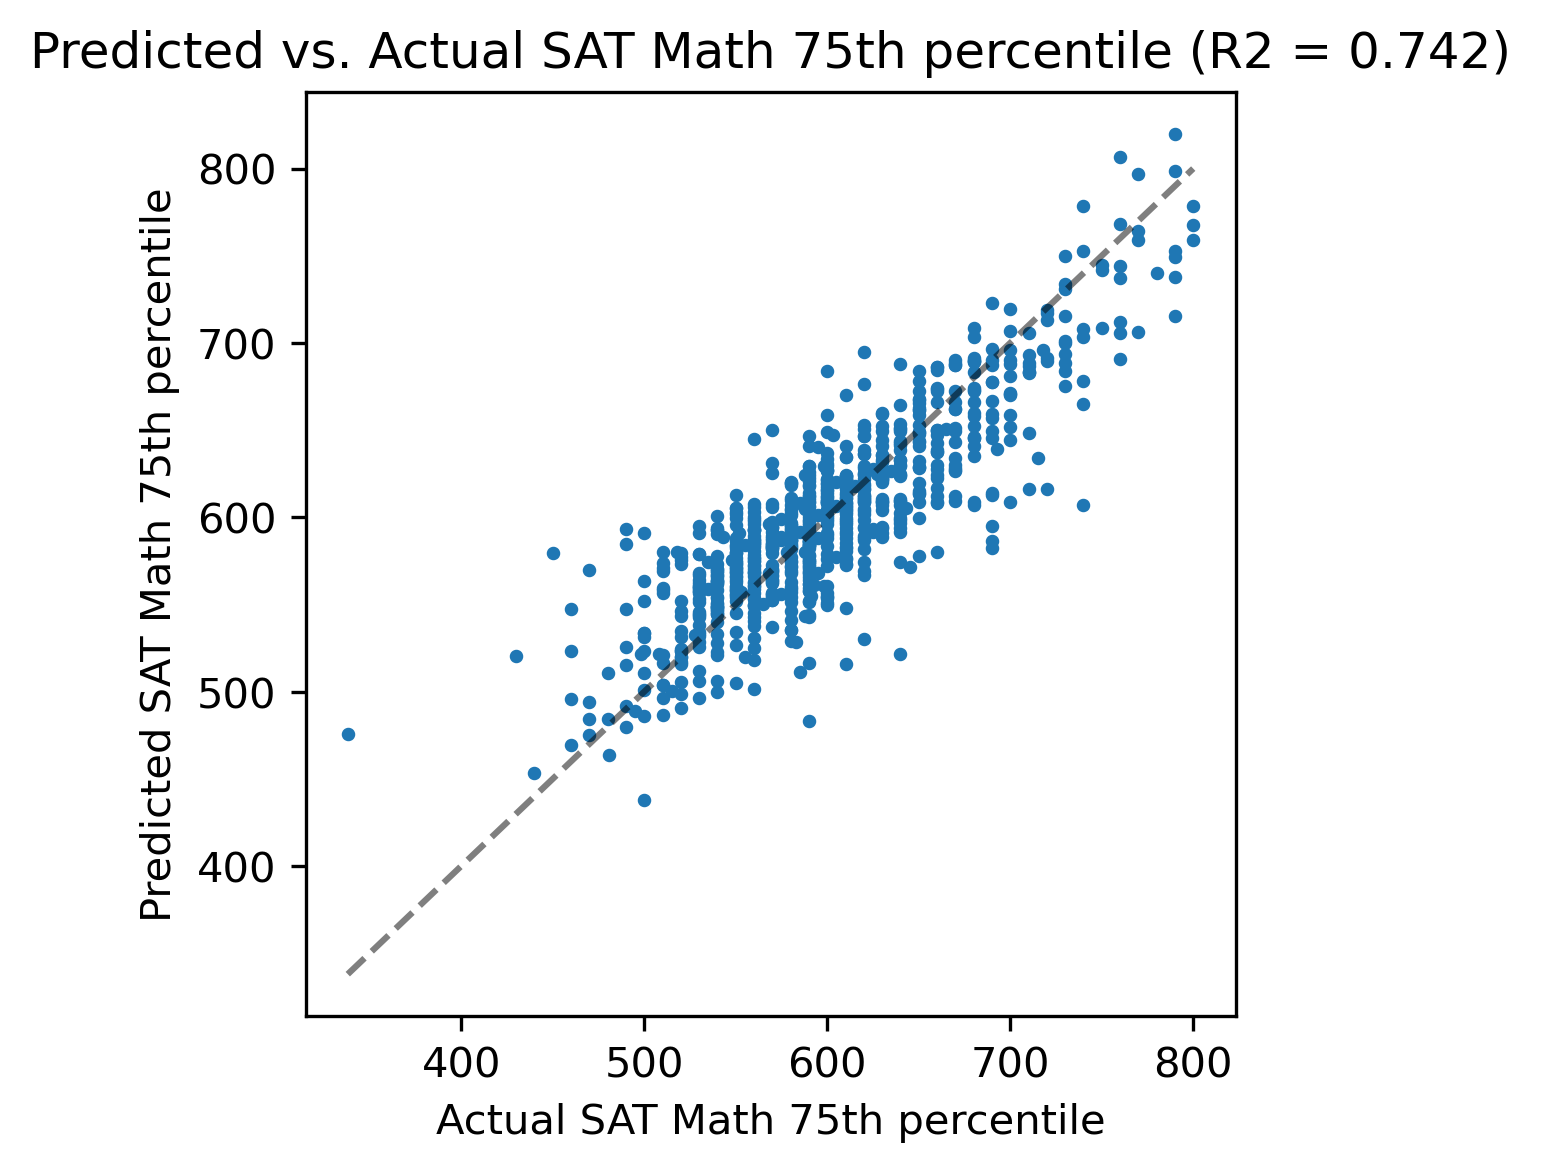

In [31]:
from sklearn.metrics import r2_score

# training model on data
model =  lm.LinearRegression(normalize = True)
model.fit(x, y) 

# isolating coefficients
coef = model.coef_
intercept = model.intercept_

pred_label = f'Predicted {y_feat}'
act_label = f'Actual {y_feat}'

# creating new dataframe with predicted and true data
y_pred = pd.DataFrame(model.predict(x), columns = [pred_label])

df_true_pred = pd.concat([y, y_pred], axis = 1)
df_true_pred.T

# calculating r2
r2 = r2_score(y_pred = y_pred, y_true = y)

# plotting
plt.figure(dpi = 300)
plt.scatter(y, y_pred, s = 5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', c = 'black', alpha = 0.5)
plt.plot
plt.xlabel(act_label)
plt.ylabel(pred_label)
plt.rcParams['figure.figsize'] = (4, 4)
plt.title(f'Predicted vs. Actual {y_feat} (R2 = {r2:.3f})')

In [33]:
model.feature_importance_

AttributeError: 'LinearRegression' object has no attribute 'feature_importance_'